In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = (200)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/yashvardhanpatil/Assignment-Dataset/main/Simple%20Linear%20Regression/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

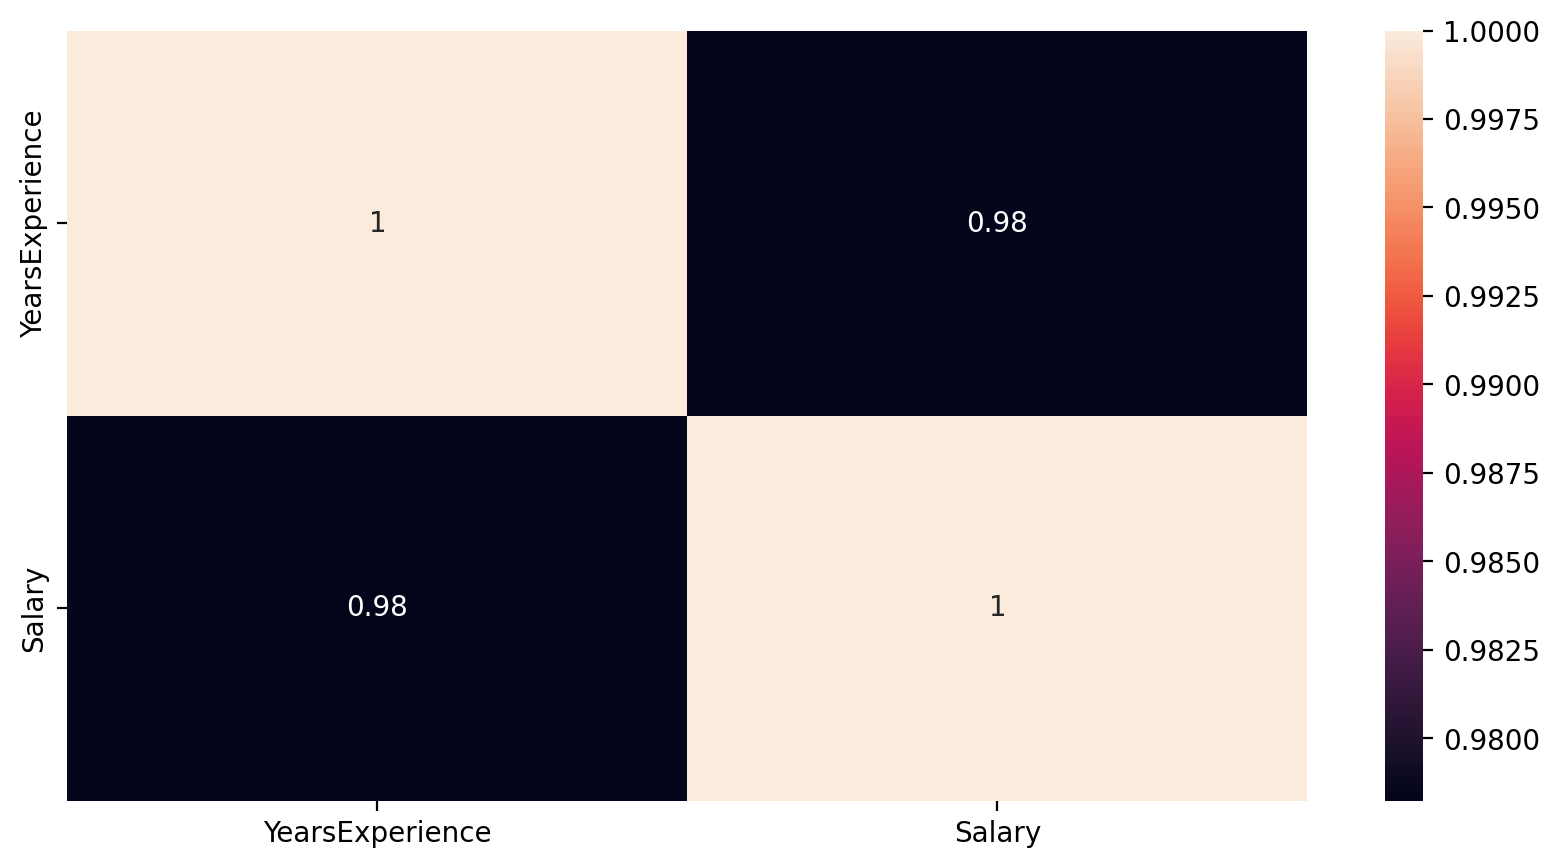

In [6]:
sns.heatmap(df.corr(),annot=True
           )

<AxesSubplot:xlabel='Salary', ylabel='Density'>

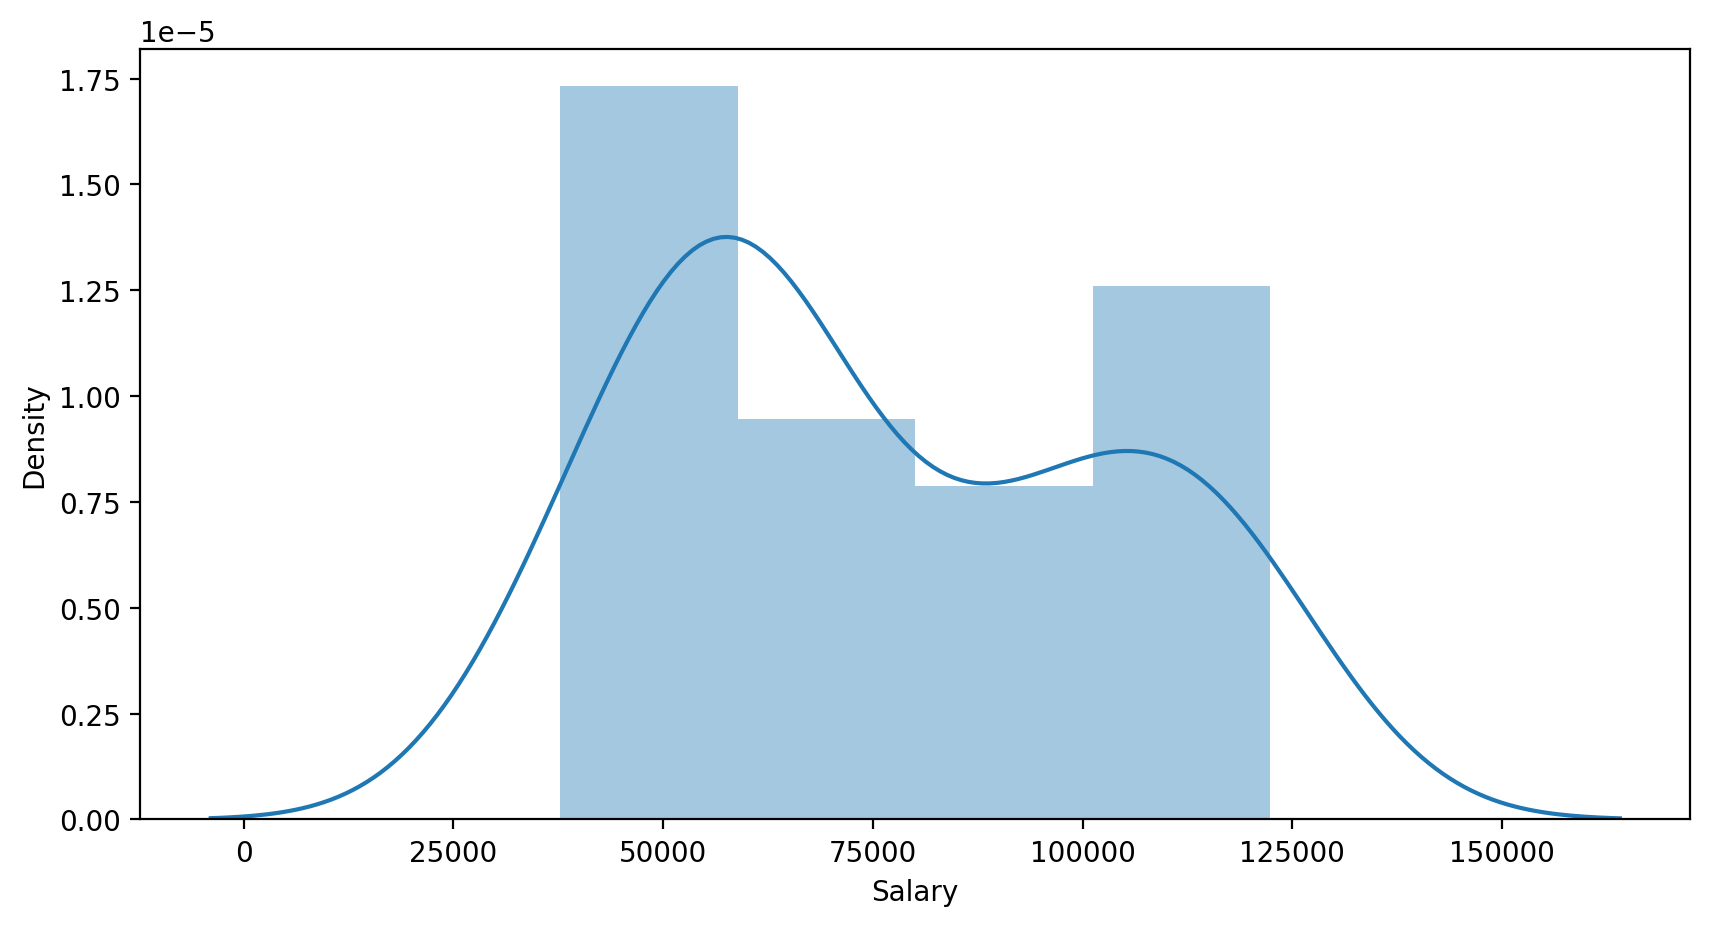

In [7]:
sns.distplot(df['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

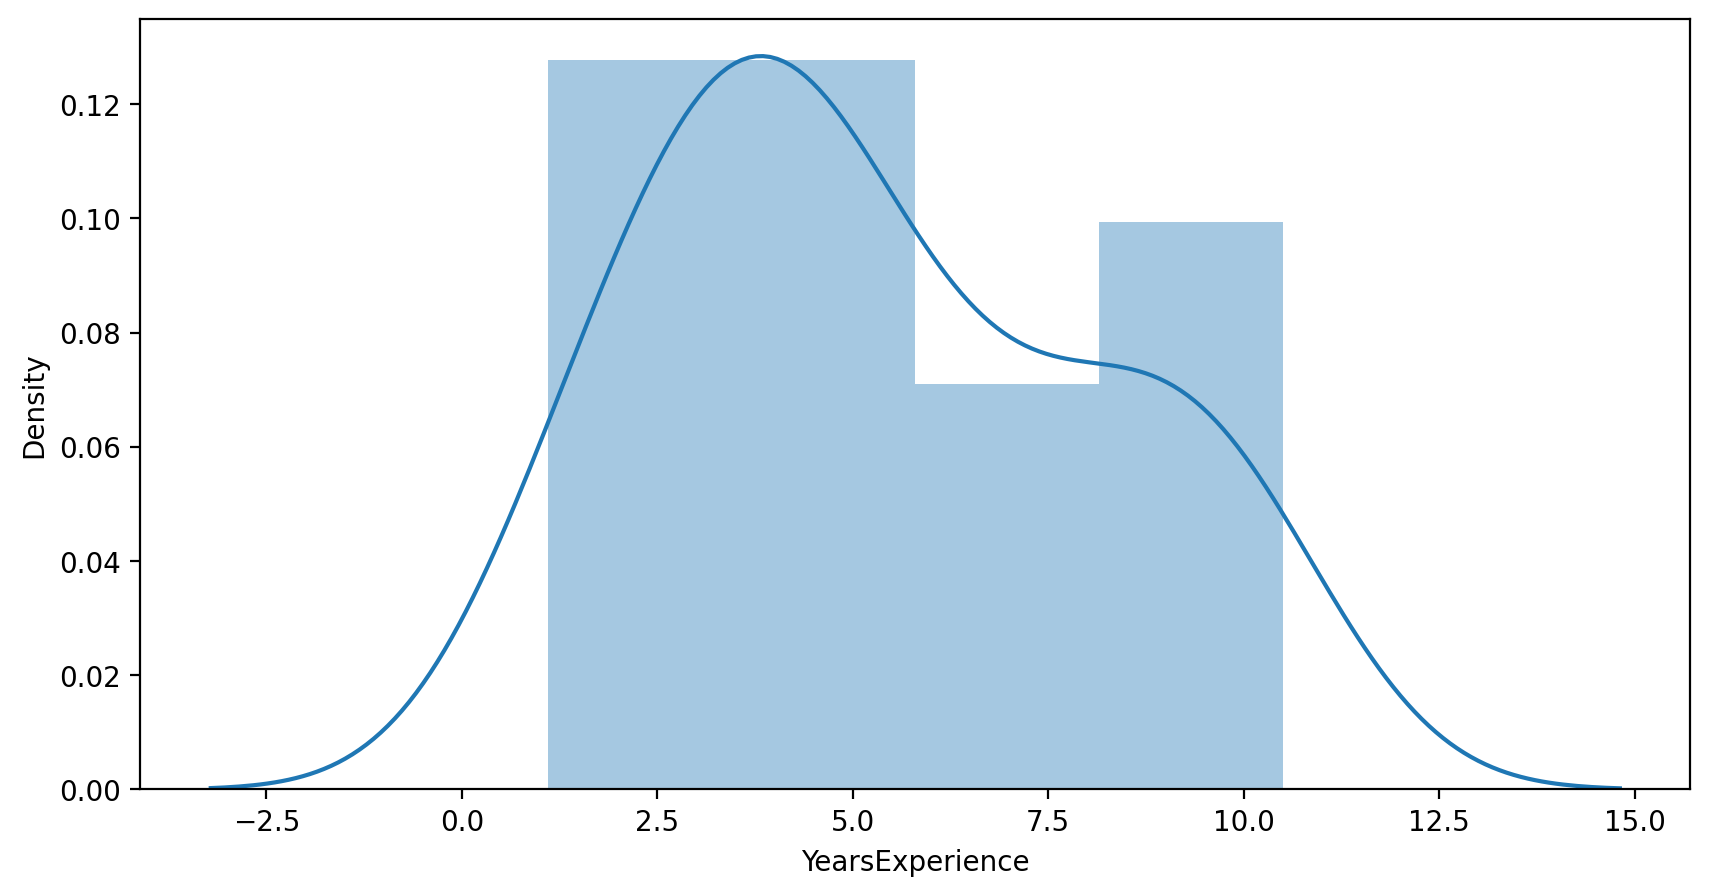

In [8]:
sns.distplot(df['YearsExperience'])

In [9]:
import statsmodels.formula.api as smf

In [10]:
model = smf.ols('Salary~YearsExperience',data=df).fit()
model

In [11]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [12]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

# Model Prediction

In [13]:
salary = (25792.200199) + ( 9449.962321)*4
salary

63592.049483

In [14]:
new_data = pd.Series([2,5,7.5,11,15])
new_data

0     2.0
1     5.0
2     7.5
3    11.0
4    15.0
dtype: float64

In [15]:
data_pread = pd.DataFrame(new_data,columns=['YearsExperience'])
data_pread

,YearsExperience
0,2.0
1,5.0
2,7.5
3,11.0
4,15.0


In [16]:
model.predict(data_pread)

0     44692.124842
1     73042.011806
2     96666.917610
3    129741.785735
4    167541.635020
dtype: float64

# Data Transformation

### 1) Sqrt
### 2) Log

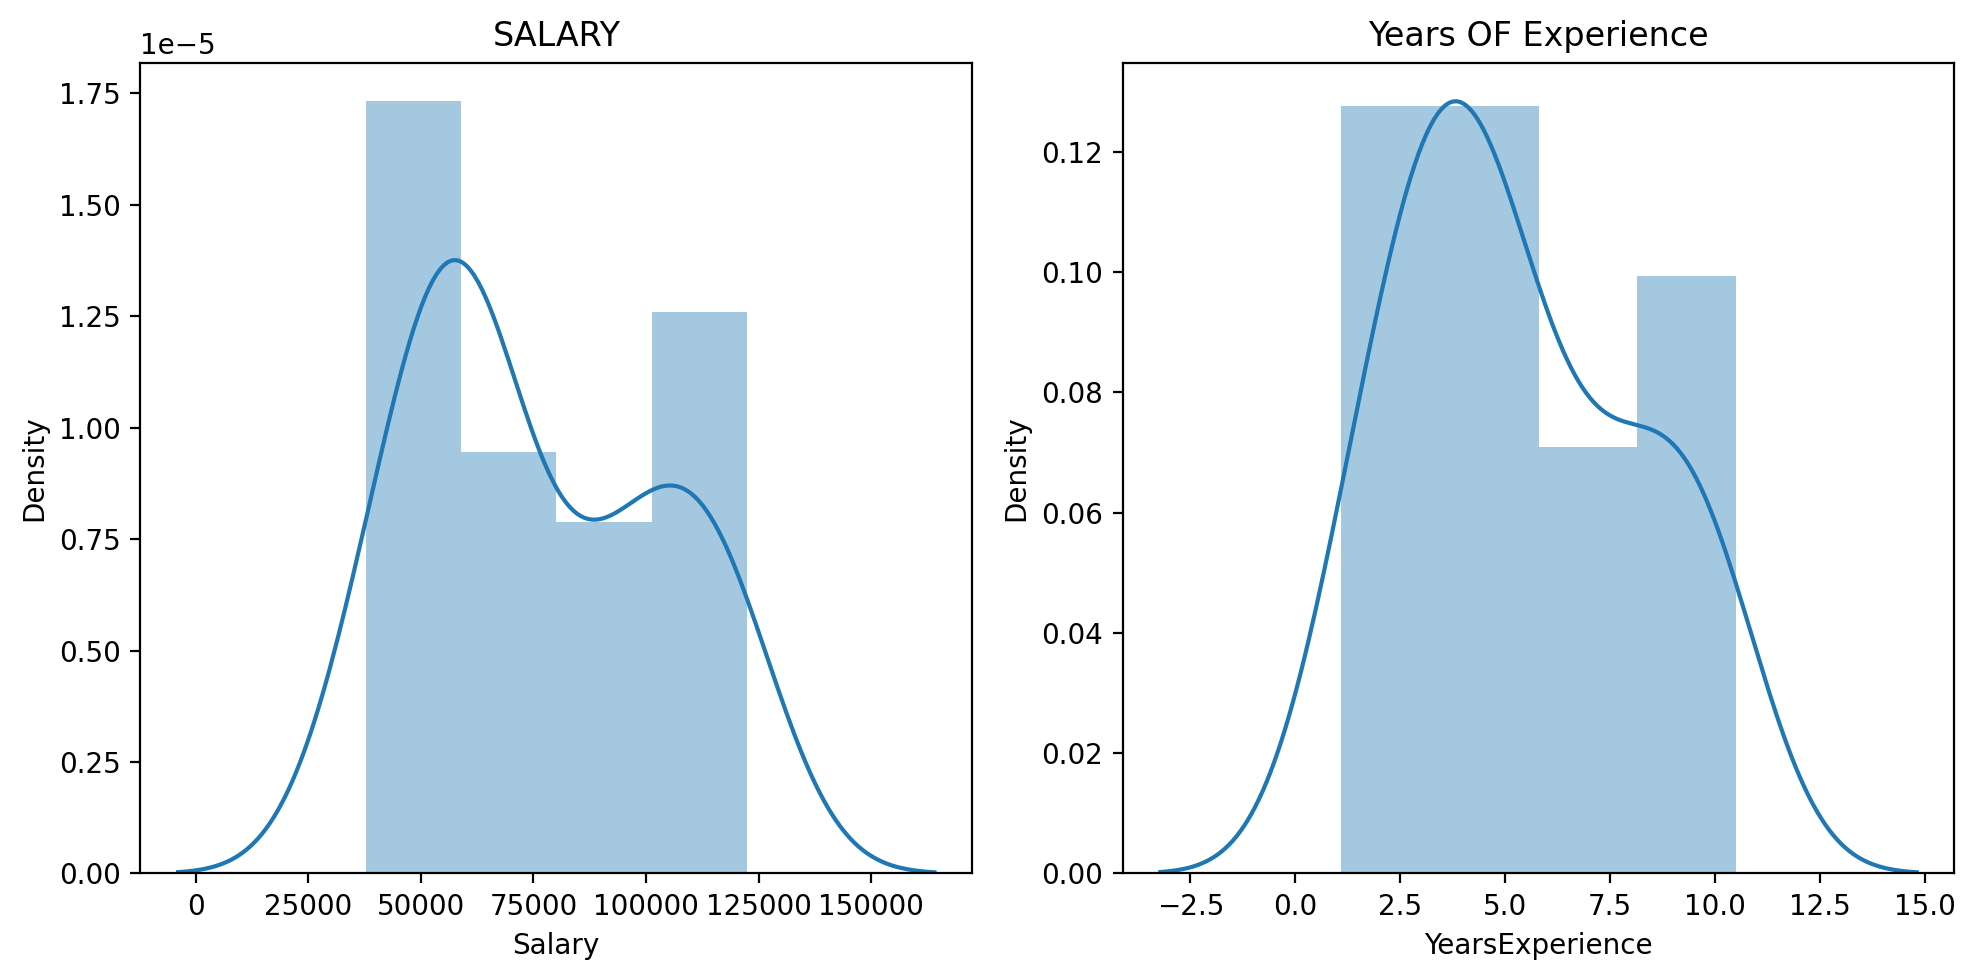

In [17]:
plt.subplot(1,2,1)
sns.distplot(df['Salary'])
plt.title('SALARY')

plt.subplot(1,2,2)
sns.distplot(df['YearsExperience'])
plt.title('Years OF Experience')

plt.tight_layout()

In [19]:
df['Salary'].skew()

0.35411967922959153

In [20]:
df['YearsExperience'].skew()

0.37956024064804106

# Log Transformation

In [21]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [22]:
df['log_ex'] = np.log(df['YearsExperience'])
df['log_salary'] = np.log(df['Salary'])
df.head()

,YearsExperience,Salary,log_ex,log_salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906


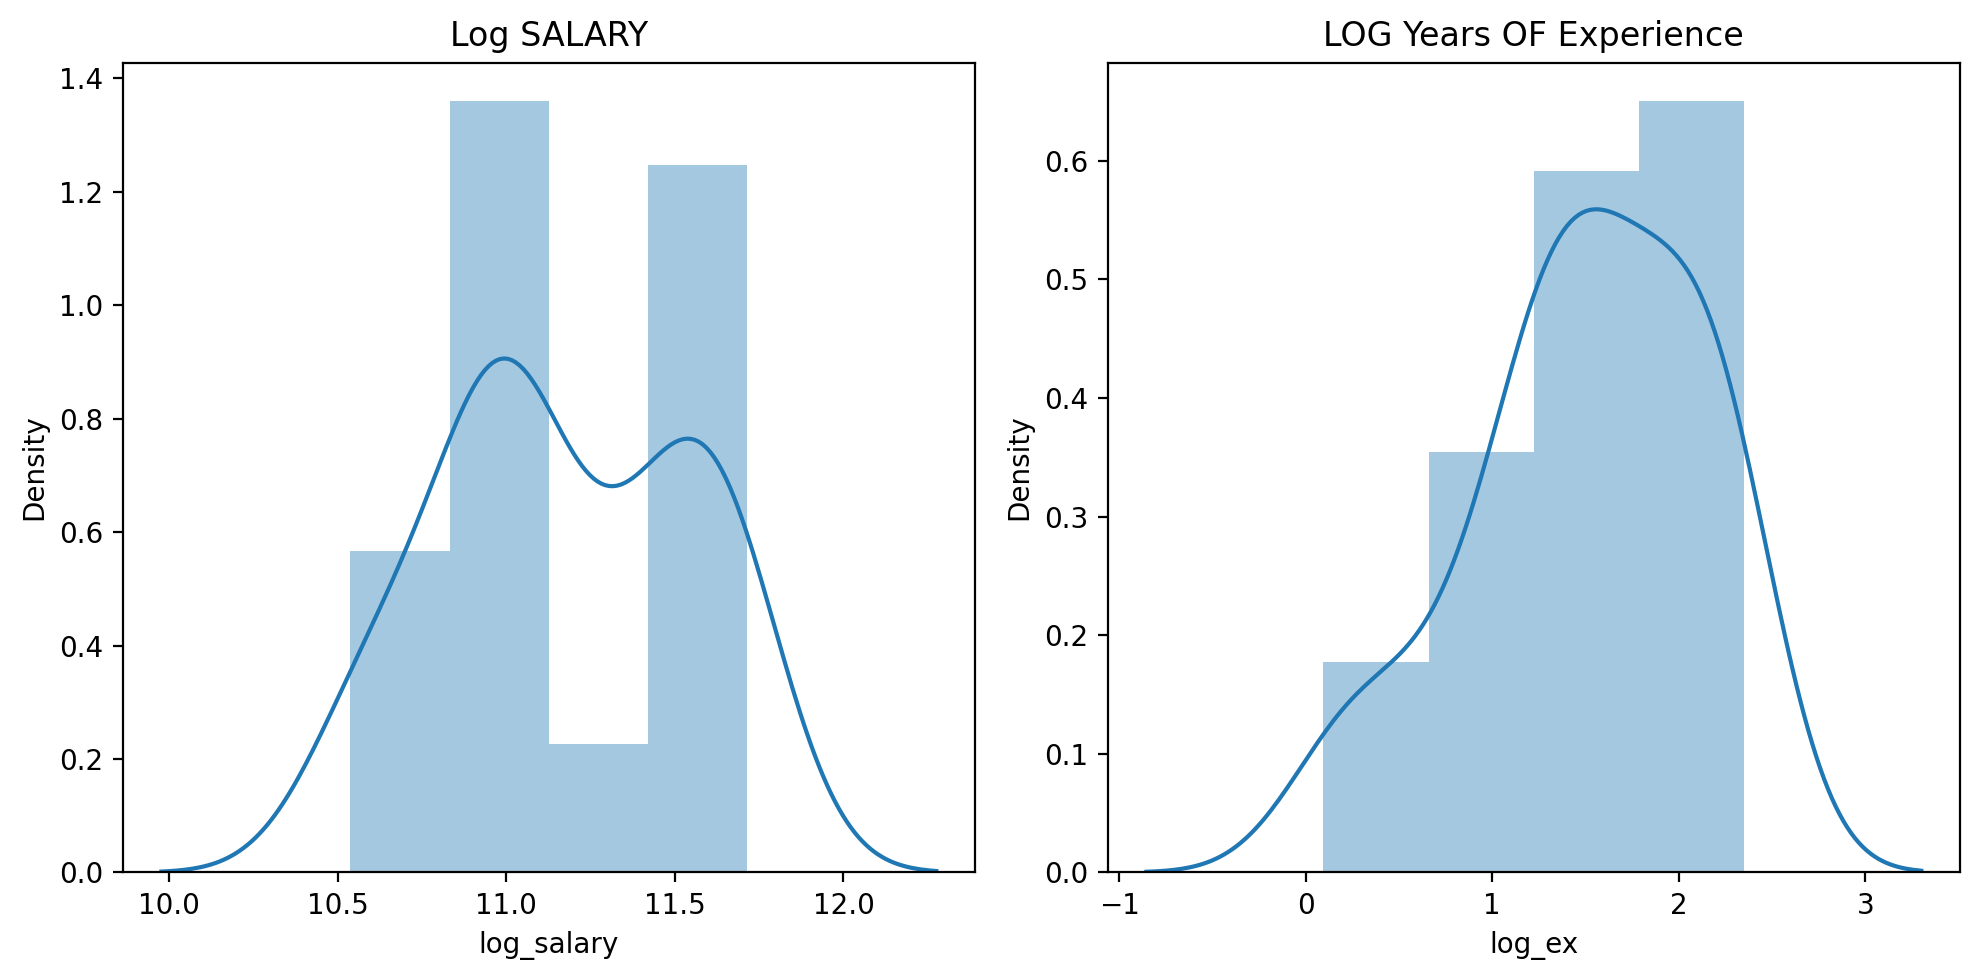

In [23]:
plt.subplot(1,2,1)
sns.distplot(df['log_salary'])
plt.title('Log SALARY')

plt.subplot(1,2,2)
sns.distplot(df['log_ex'])
plt.title('LOG Years OF Experience')

plt.tight_layout()

In [24]:
df['log_ex'].skew()

-0.6005648582626513

In [25]:
df['log_salary'].skew()

-0.044126086756988495